<a href="https://colab.research.google.com/github/Bhardwajjyash/Vehicle-Insurance-Prediction-/blob/main/Yet_another_copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Vehicle Insurance Response Prediction using Machine Learning



##### **Project Type**    - Classification
##### **Contribution**    - Individual

##### **Name: Yash Bhardwaj**     


# **Project Summary -**

In this project, I used machine learning techniques to develop a prediction model that classifies whether a customer is likely to purchase vehicle insurance or not. The steps involved were:

Data Preprocessing: Cleaned the dataset by removing unnecessary features and handling missing values.

Class Imbalance Handling: Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset, since most customers were not interested.

Model Building: Tried different models – Logistic Regression, Decision Tree, and Random Forest.

Model Selection: Chose Random Forest Classifier as the final model because it performed best in terms of recall, accuracy, and F1-score for both classes.

Model Explainability: Used feature importance from Random Forest to understand which features most influenced predictions, such as Age, Policy Sales Channel, and Annual Premium.

Evaluation Metrics: Evaluated models using accuracy, precision, recall, F1-score, and confusion matrix to measure performance.

This model can now help the business focus marketing efforts on the right group of people, improving overall campaign success and cost-efficiency.

# **GitHub Link -**

https://github.com/Bhardwajjyash/Vehicle-Insurance-Prediction-

# **Problem Statement**


Insurance companies often run marketing campaigns to promote vehicle insurance policies. However, a major challenge is that only a small portion of customers actually respond positively, leading to wasted marketing costs and efforts. The dataset used here is highly imbalanced, with very few customers showing interest.
The goal of this project is to build a machine learning model that accurately predicts whether a customer will be interested in buying vehicle insurance. This will help the company target the right customers, improve efficiency, and reduce unnecessary expenses.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Data Set/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


<Axes: >

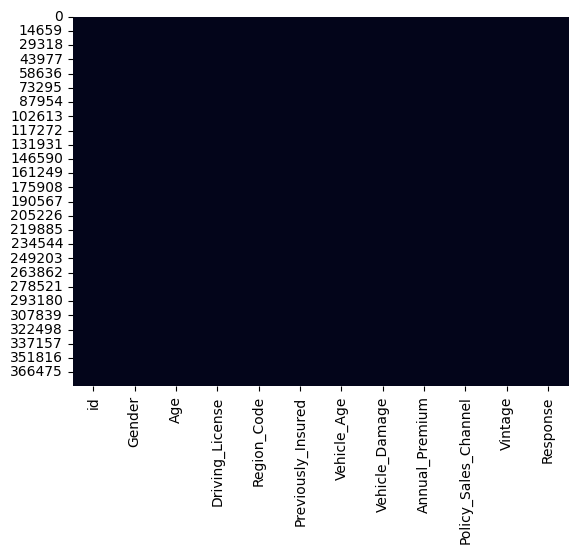

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

There are no NUll values in our Dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

| Column Name                | Description                                                                |
| -------------------------- | -------------------------------------------------------------------------- |
| **id**                     | Unique customer ID (not useful for prediction, usually dropped).           |
| **Gender**                 | Customer gender: `'Male'` or `'Female'`.                                   |
| **Age**                    | Customer's age in years.                                                   |
| **Driving\_License**       | Whether the customer has a driving license: `1 = Yes`, `0 = No`.           |
| **Region\_Code**           | Encoded region the customer belongs to (e.g., `28.0`, `46.0` etc).         |
| **Previously\_Insured**    | Whether the customer already has vehicle insurance: `1 = Yes`, `0 = No`.   |
| **Vehicle\_Age**           | Age of the vehicle: values like `"< 1 Year"`, `"1-2 Year"`, `"> 2 Years"`. |
| **Vehicle\_Damage**        | Whether the vehicle was ever damaged: `'Yes'` or `'No'`.                   |
| **Annual\_Premium**        | Premium amount (in ₹) paid by the customer per year.                       |
| **Policy\_Sales\_Channel** | Channel used to purchase the policy (like agents, online, etc.).           |
| **Vintage**                | Number of days the customer has been associated with the company.          |
| **Response**               | **Target variable**: `1 = Purchased insurance`, `0 = Did not purchase`.    |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['Gender_Numeric'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Vehicle_Damage_Numeric'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df['Vehicle_Age_Numeric'] = df['Vehicle_Age'].map({
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
})

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Numeric,Vehicle_Damage_Numeric,Vehicle_Age_Numeric
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,1,2
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,0,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,1,2
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,0,0


### What all manipulations have you done and insights you found?

I have converted all the important columns to numeric value so that they can be used in our model

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

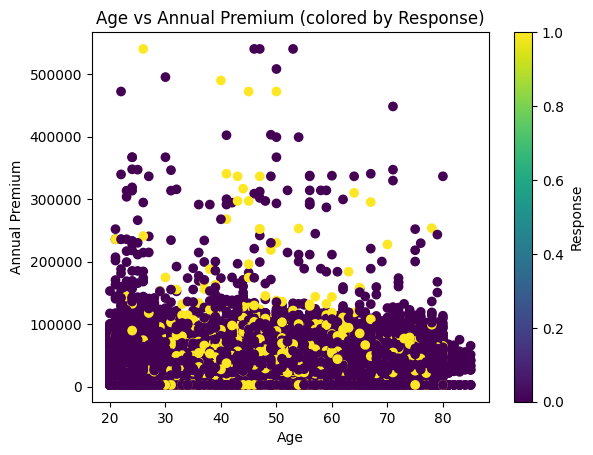

In [ ]:
# Chart - 1 visualization code
plt.scatter(df['Age'], df['Annual_Premium'], c=df['Response'], cmap='viridis')
plt.title("Age vs Annual Premium (colored by Response)")
plt.xlabel("Age")
plt.ylabel("Annual Premium")
plt.colorbar(label='Response')
plt.show()


##### 1. Why did you pick the specific chart?

This scatter plot was chosen because it visualizes the relationship between two important continuous features:

Age of customers

Annual Premium they are paying

It also uses color to represent the “Response” variable, which is the target (i.e., whether a customer is interested in vehicle insurance).
This helps in understanding patterns in customer behavior across different age and premium segments.

##### 2. What is/are the insight(s) found from the chart?

Most of the responses (Response = 1, yellow dots) are concentrated around lower to medium premium values (below ₹150,000).

The majority of high-premium customers (> ₹300,000) did not respond positively to the insurance offer.

There is a broad distribution of age, but response does not strongly correlate with a specific age group.

Younger and middle-aged people with moderate premiums seem more likely to respond positively.

A very high premium may be a deterrent regardless of age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Targeting Strategy: The company can focus marketing and offers on individuals with moderate annual premiums and within the 25–55 age range, where most of the positive responses are clustered.

Product Bundling: Tailored premium offerings in that range may lead to higher conversions.

 Potential Negative Impact / Risk of Negative Growth:
If the company continues to target very high premium customers, especially older age groups, conversion rates may remain low, increasing marketing costs with poor ROI.

Misinterpreting this chart as “only age matters” would be a mistake — annual premium seems more influential on user interest than age alone.

#### Chart - 2

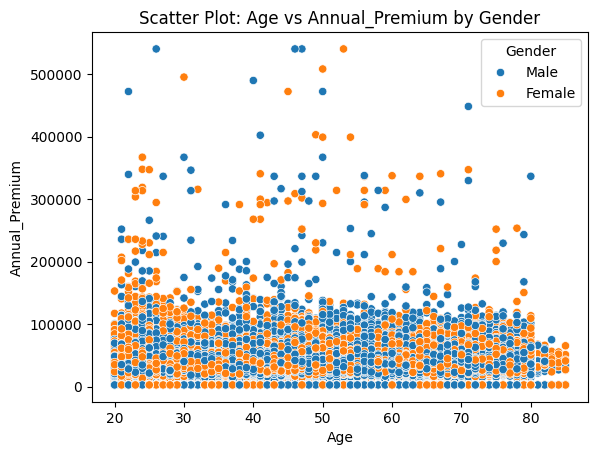

In [ ]:
# Chart - 2 visualization code
import seaborn as sns

sns.scatterplot(data=df, x='Age', y='Annual_Premium', hue='Gender')
plt.title("Scatter Plot: Age vs Annual_Premium by Gender")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen because it allows us to:

Compare insurance premium trends across age groups, and

Observe gender-based differences in those trends.

It uses:

Age (X-axis)

Annual Premium (Y-axis)

Color (hue) for Gender (Male vs Female)

This type of chart is excellent for spotting hidden patterns or biases related to gender in premium pricing or customer demographics.

##### 2. What is/are the insight(s) found from the chart?

Both male and female customers are spread across all age groups.

Majority of Annual Premiums cluster under ₹150,000, regardless of gender.

However:

Females (orange dots) slightly outnumber males in the lower premium segments.

Males (blue dots) tend to dominate the higher premium range, especially above ₹300,000.

Very few older customers (above age 65) pay extremely high premiums.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
The company can tailor its pricing or offers based on gender & age insights:

Consider offering loyalty rewards or lower premiums to female customers in lower age brackets (20–40), where competition is higher.

Create customized marketing for males in the 30–60 age range who seem more likely to pay higher premiums.

Gender-segmented strategies can help boost both retention and acquisition.

 Potential Risks / Negative Insights:
Ignoring gender dynamics could mean missing out on potential optimizations in pricing strategy.

If male customers are systematically being charged higher premiums, it could lead to dissatisfaction or churn, unless justified by risk factors.

#### Chart - 3

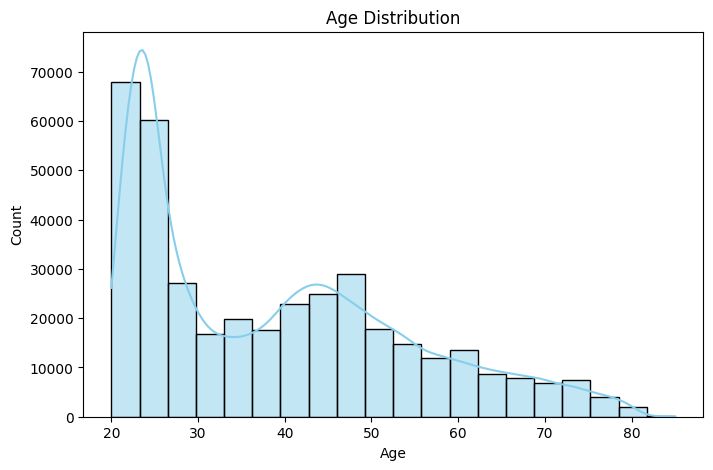

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to:

Understand the distribution of customers by age.

Identify which age groups dominate the dataset.

Detect any skewness or irregularity in the age demographics.

It’s a histogram with a KDE (Kernel Density Estimation) curve, which shows both:

Counts of individuals in each age bin.

Smoothed probability density of the age variable.

##### 2. What is/are the insight(s) found from the chart?

The dataset is heavily skewed toward younger customers:

Majority are between 20–30 years old.

There's a sharp drop-off after age 30.

A small secondary bump is seen in the 40–50 age range.

Very few customers are aged above 60.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact:
Since young adults dominate the customer base:

Design products/packages targeted at ages 20–30.

Offer online/mobile-first features suited for digital-savvy younger audiences.

Opportunity to build long-term customer lifetime value by engaging them early.

 Possible Risks / Negative Insight:
The older segment (50+) is underrepresented, meaning:

The company may be missing out on a high-value, low-risk demographic.

Age bias in marketing or outreach could lead to missed revenue opportunities.

May also skew modeling results if not handled (especially in classification models).

#### Chart - 4

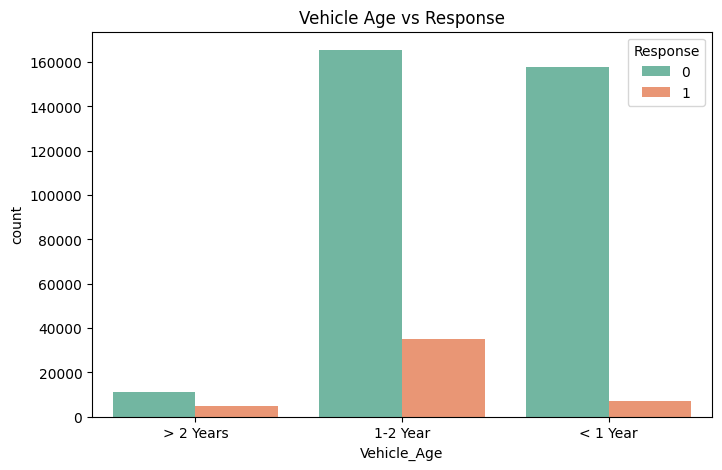

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vehicle_Age', hue='Response', palette='Set2')
plt.title('Vehicle Age vs Response')
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to:

Analyze the impact of vehicle age on customer response to insurance offers.

Check whether customers with newer or older vehicles are more likely to opt for insurance.

Support targeted marketing strategies based on vehicle ownership age.

It's a count plot that shows:

The number of people who responded (Response = 1) or did not (Response = 0) across each Vehicle Age group.

##### 2. What is/are the insight(s) found from the chart?

The "1-2 Year" vehicle group has the highest response count (both in total and for positive responses).

Customers with vehicles older than 2 years or less than 1 year old are less likely to respond positively.

People with mid-aged vehicles (1-2 years) are most likely to buy insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Target customers with vehicles aged 1-2 years for cross-sell campaigns, since they show:

Higher engagement

More willingness to buy insurance

Develop custom insurance packages for this segment (e.g., loyalty rewards or renewal incentives).

 Potential Concerns:
Customers with brand new (<1 year) or older (>2 years) vehicles may be disengaged or less interested.

Could be due to perception of lesser need or having alternate insurance.

Company may need to redesign or reposition offerings for these two segments.

#### Chart - 5

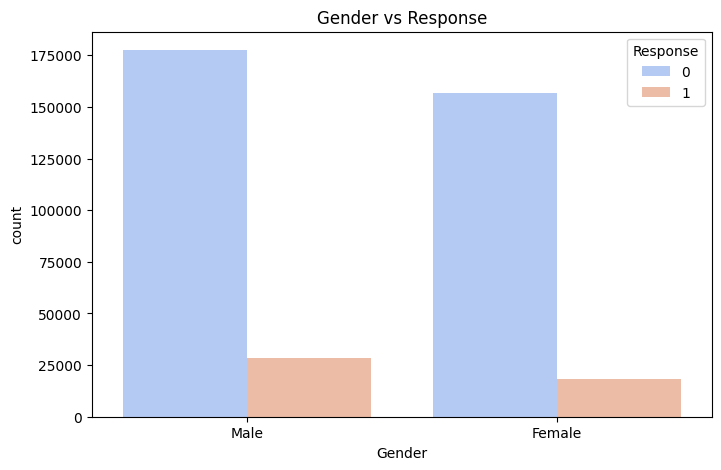

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Response', palette='coolwarm')
plt.title('Gender vs Response')
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to:

Understand the influence of gender on customer response to the insurance offer.

Help identify if targeted gender-based marketing can improve conversion rates.

Explore if male or female customers are more likely to opt for insurance.

##### 2. What is/are the insight(s) found from the chart?

Male customers:

Have higher overall count in the dataset.

Show a higher number of positive responses (Response = 1) compared to females.

Female customers:

Represent a slightly smaller portion of the total dataset.

Show fewer positive responses, both in count and proportion.

 Insight:
Male customers are more responsive to the insurance offering than females in both absolute and relative terms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact:
Male customers can be considered a priority target group for campaigns, especially those with mid-aged vehicles (from previous insight).

Gender-based messaging can be tailored to increase appeal.

 Negative/Challenging Insight:
Female customers have lower response rates, which might indicate:

Lack of trust

Misalignment with current product offerings

Lower perceived need

#### Chart - 6

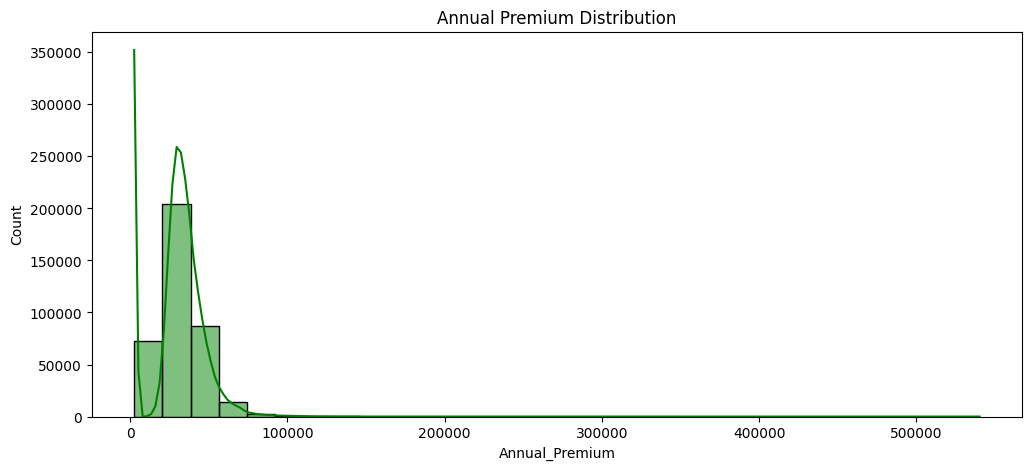

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 5))
sns.histplot(df['Annual_Premium'], kde=True, bins=30, color='green')
plt.title('Annual Premium Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps:

Understand the pricing structure of the insurance products.

Identify if there are outliers or skewness in premium amounts.

Explore whether certain premium ranges are more popular or affordable for customers.



##### 2. What is/are the insight(s) found from the chart?

The distribution is right-skewed (positively skewed), meaning:

Most customers pay lower to mid-range premiums.

A small number of customers pay very high premiums (outliers).

The peak occurs in the range of approximately 20,000 to 40,000 in annual premiums.

Very few customers are in the premium brackets > 100,000, although such values do exist.

 Insight:
The majority of customers fall into an affordable premium segment, which could be the sweet spot for pricing new products or offers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact:
Helps pricing teams focus on the 20k–40k range while designing future insurance plans.

Allows for personalized marketing—e.g., high-paying customers could be offered premium services or loyalty programs.

Can help detect potential fraud or data quality issues due to outliers.

 Potential Risks / Red Flags:
A long tail with extreme values suggests possible:

Errors in data entry

Mispriced policies

Low-volume high-value products that may need a different handling strategy

#### Chart - 7

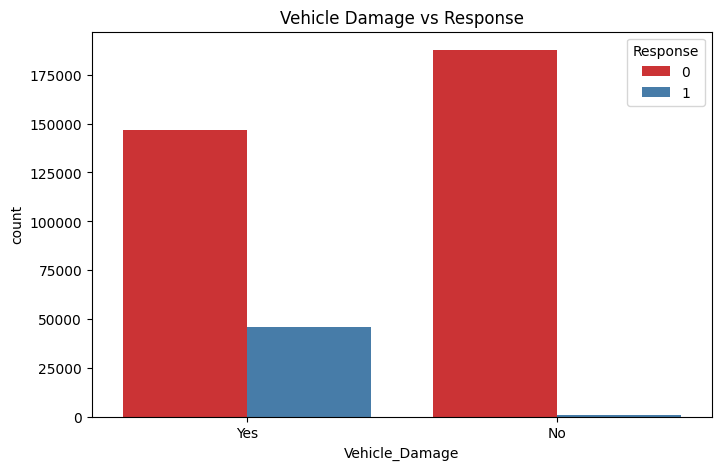

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vehicle_Damage', hue='Response', palette='Set1')
plt.title('Vehicle Damage vs Response')
plt.show()

##### 1. Why did you pick the specific chart?

This chart is valuable to:

Understand the relationship between past vehicle damage history and the likelihood of insurance policy purchase (Response).

Identify target customer segments based on vehicle condition.

##### 2. What is/are the insight(s) found from the chart?

Customers whose vehicles were previously damaged ("Yes") are:

More likely to respond positively (i.e., interested in insurance → Response = 1).

Although fewer in total count, they have a significantly higher conversion rate compared to those without damage.

On the other hand, customers with no past vehicle damage ("No") have:

A much lower positive response rate.

Most of them declined the insurance offer (Response = 0).

 Insight:
Vehicle damage is a strong indicator of customer interest in insurance. People who had previous damage may feel the need for protection and are thus more likely to convert.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Enables targeted marketing:

Prioritize customers with a “Yes” in Vehicle_Damage for campaigns.

Create specialized offers or coverage plans for them.

Improves model performance if used as a feature in predictive models.

 Risks or Negative Implications:
Over-focusing on “damaged” vehicle owners might neglect low-risk profiles, who could also convert with the right approach.

Need to validate if data on "Vehicle_Damage" is consistently accurate (possible reporting bias).



#### Chart - 8

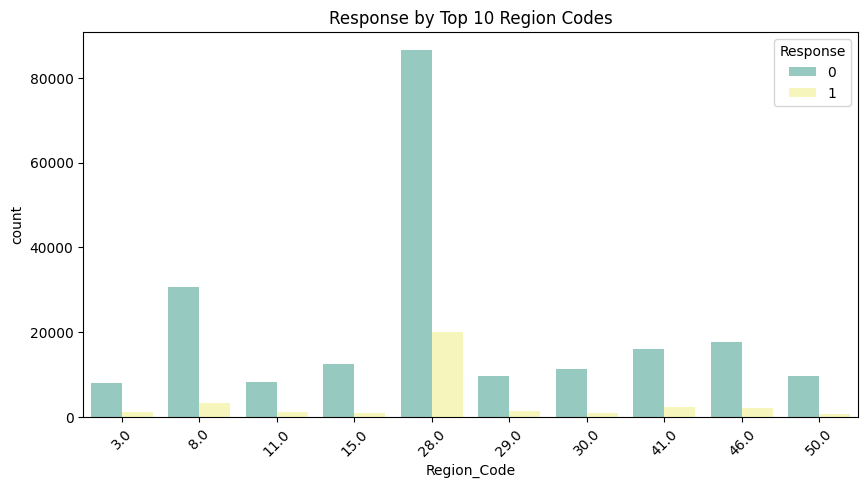

In [ ]:
# Chart - 8 visualization code
top_regions = df['Region_Code'].value_counts().head(10).index
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Region_Code'].isin(top_regions)],
              x='Region_Code', hue='Response', palette='Set3')
plt.title('Response by Top 10 Region Codes')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected because:

It helps visualize how customer response (0 = No, 1 = Yes) varies across different regions.

Region-wise segmentation is valuable for targeted marketing and sales strategy.

Bar charts are intuitive for comparing categorical distributions, especially grouped by another category (Response here).

##### 2. What is/are the insight(s) found from the chart?

Several insights are evident:

Region_Code 28.0 has by far the highest number of customers, both responding (1) and not responding (0).

Region_Code 8.0, 41.0, and 46.0 also have significant volumes, but much lower positive responses.

In most regions, the count of Response = 0 is much higher than Response = 1.

Region_Code 28.0 has the highest absolute number of positive responses — this region is promising for conversions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Here's how:

Regions like 28.0 with high volume and high positive response are ideal targets for marketing campaigns → better ROI.

Insights help prioritize regional marketing budgets, enabling targeted and efficient customer acquisition.

Low-performing regions (like 29.0 or 3.0) with very few positives can be excluded or deprioritized, saving costs.   

Not directly, but:

If a business over-focuses on low-conversion regions (e.g., 3.0, 11.0), it can waste marketing budget with minimal return.

Also, relying only on volume (like Region 28.0) without segmenting further (age, policy type, etc.) may lead to diminishing returns.

Thus, while the chart brings positive insights, misinterpretation or over-reliance on raw counts without deeper segmentation can lead to inefficiency or negative ROI.

#### Chart - 9 - Correlation Heatmap

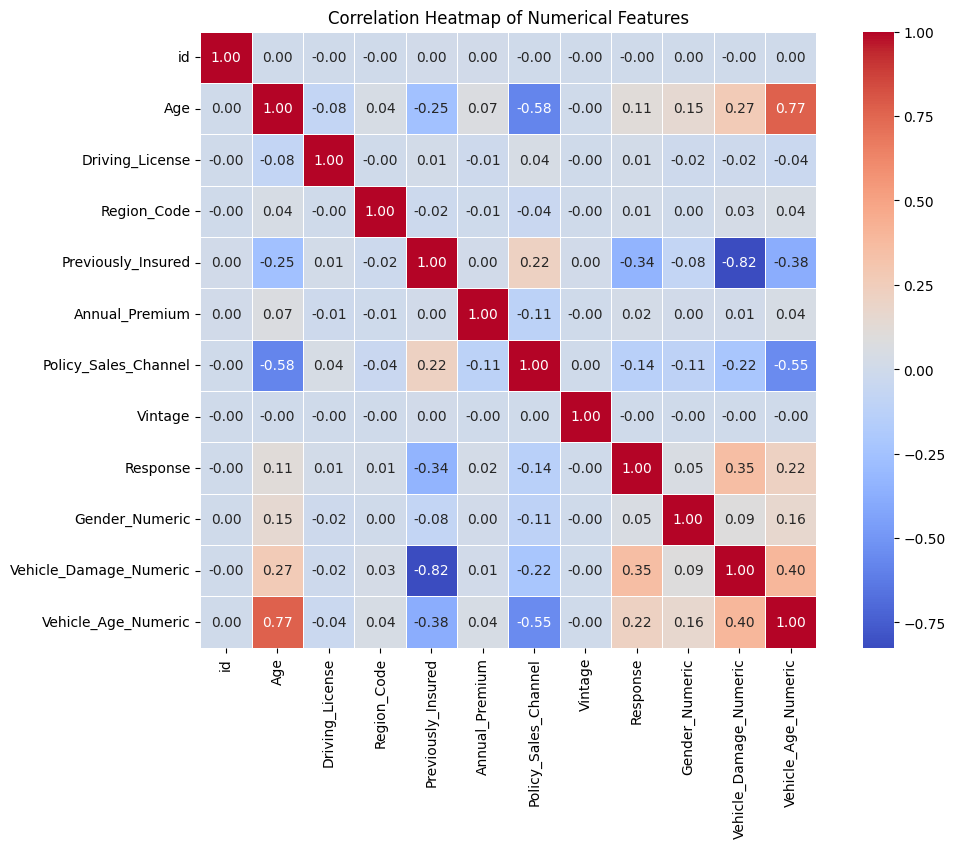

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12, 8))
num_features = df.select_dtypes(include=['int64', 'float64'])  # numeric columns only
correlation_matrix = num_features.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

This is a Correlation Heatmap — a visual tool used to:

Understand linear relationships between numerical features.

Detect multicollinearity (high correlation between independent features).

Help with feature selection: remove redundant features and focus on those correlated with the target (Response here).

It is visually intuitive for comparing multiple variables at once.



##### 2. What is/are the insight(s) found from the chart?

 A. Correlation with the Target (Response)
Vehicle_Damage_Numeric (correlation: +0.35) has the strongest positive correlation with Response.
 People whose vehicles were damaged are more likely to respond positively to insurance offers.

Previously_Insured has a negative correlation (−0.34) with Response.
 Customers already insured are less likely to respond, probably because they don’t need another policy.

Vehicle_Age_Numeric has a mild positive correlation (0.22), meaning older vehicle owners respond better.

 B. Strong Feature Inter-Correlations
Age and Vehicle_Age_Numeric: +0.77 → Older people tend to have older vehicles.

Previously_Insured and Vehicle_Damage_Numeric: −0.82 → Those already insured are less likely to report damage.

 C. Features with Very Low Correlation
Region_Code, Vintage, Annual_Premium, Driving_License, Gender_Numeric — all show low or near-zero correlation with Response.
 These features may not be strong individual predictors, but might help in combination.

#### Chart - 10 - Pair Plot

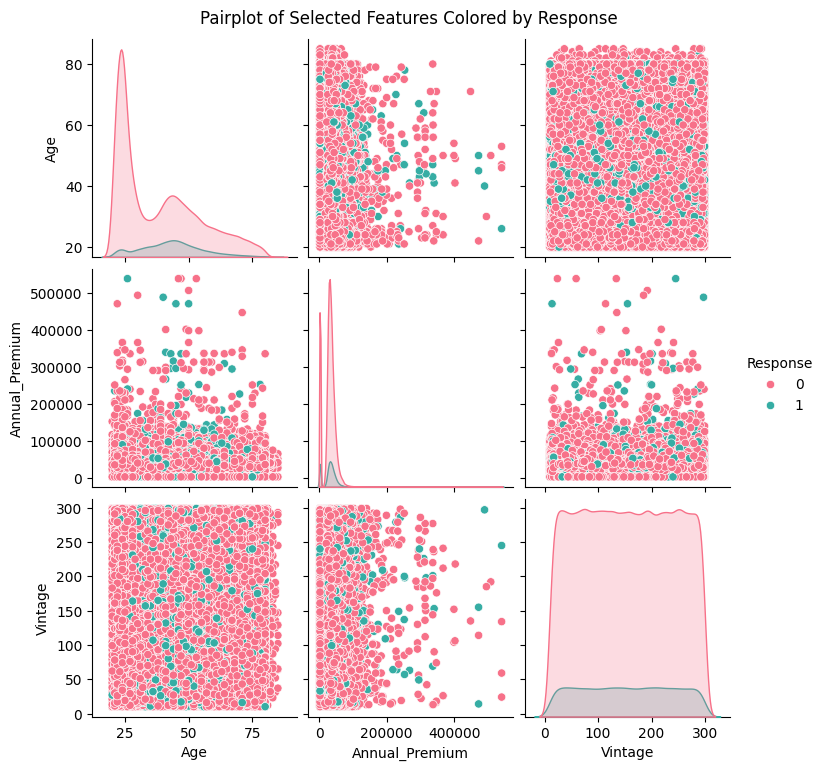

In [ ]:
# Pair Plot visualization code
selected_features = ['Age', 'Annual_Premium', 'Vintage', 'Response']

sns.pairplot(df[selected_features], hue='Response', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features Colored by Response", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

This pairplot helps us:

Visualize relationships between multiple numeric features (Age, Annual_Premium, Vintage).

Compare how customers responded (0 = No, 1 = Yes) using color-coded dots.

Spot trends or patterns — like if higher premiums or certain age groups lead to more responses.

It’s an easy way to see distributions + relationships between features at once.

##### 2. What is/are the insight(s) found from the chart?

A. Age vs Response
Most people are between 20–40 years old.

Both responders and non-responders are present, but responders (green) are fewer and spread out.

No strong pattern, but some younger customers seem slightly more likely to respond.

 B. Annual Premium vs Response
Premium values are mostly below ₹150,000.

There's no clear premium amount where more people say “yes” (respond).

Responders are scattered, but low premium range has more green dots.

 C. Vintage vs Response
Vintage (number of days customer is associated) is almost uniformly distributed.

No clear relationship between how long they’ve been with the company and their response.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df.drop(['id', 'Response','Gender','Vehicle_Damage','Vehicle_Age'], axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

I have used a 80:20 split, meaning:

80% of the data is used for training (X_train, y_train)

20% of the data is used for testing (X_test, y_test)

Balanced trade-off:

80% is enough data for the model to learn meaningful patterns.

20% is enough for a fair evaluation of how the model performs on unseen data.

Standard practice:

It's a widely accepted default split in machine learning when working with moderate to large datasets.

It avoids underfitting (too little training data) and unreliable evaluation (too little test data).

Reproducibility:

random_state=42 ensures that the split is consistent each time you run it, which helps in debugging and result comparison.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Using SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE(random_state=42)

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: Response
0    267700
1     37187
Name: count, dtype: int64

Dataset After: Response
1    267700
0    267700
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

i have used SMOTE. It creates synthetic samples of the minority class to balance the dataset.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smt, y_train_smt)
# Predict on the model
y_pred = logreg.predict(X_test)
lr_cm=confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", lr_cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.640458135446459

Confusion Matrix:
 [[39515 27184]
 [  221  9302]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.25      0.98      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

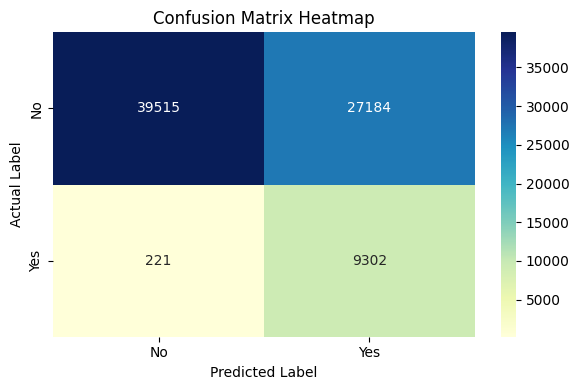

In [ ]:
# Visualizing evaluation Metric Score chart
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Plot
lr_cm = confusion_matrix(y_test, y_pred)

# 2. Define class labels (optional)
labels = ['No', 'Yes']  # For binary classification like 0 = No, 1 = Yes

# 3. Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Fit model
rf_model.fit(X_train_smt, y_train_smt)

RandomForestClassifier(random_state=42)

In [ ]:
# Visualizing evaluation Metric Score chart
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
rf_cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.8187006376111884

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89     66699
           1       0.33      0.43      0.37      9523

    accuracy                           0.82     76222
   macro avg       0.62      0.65      0.63     76222
weighted avg       0.84      0.82      0.83     76222


Confusion Matrix:
 [[58268  8431]
 [ 5388  4135]]


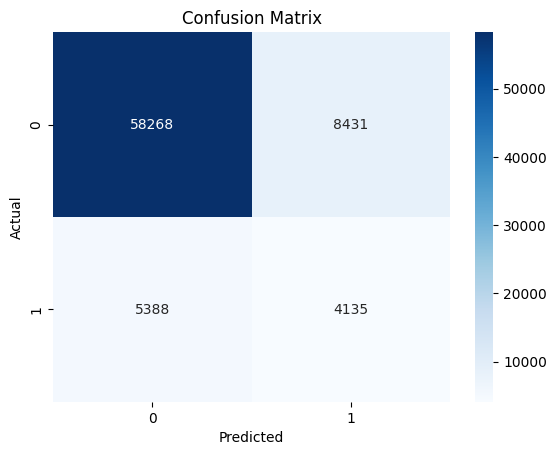

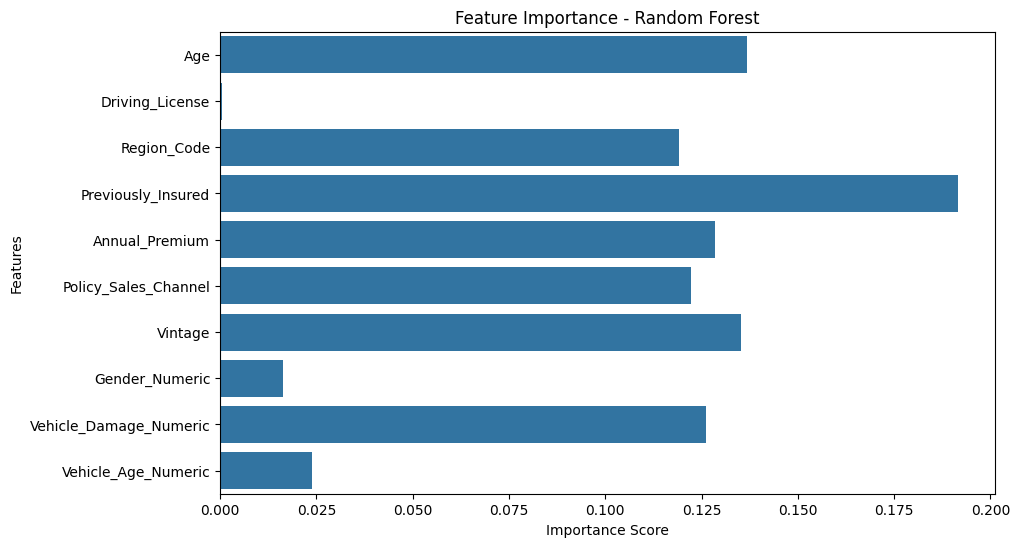

In [ ]:
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Plot
importances = rf_model.feature_importances_
features = X.columns

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeClassifier
# Fit the Algorithm
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smt, y_train_smt)

# Predict on the model
y_pred = model.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
dt_cm = confusion_matrix(y_test, y_pred)

Confusion Matrix:
 [[58212  8487]
 [ 6013  3510]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89     66699
           1       0.29      0.37      0.33      9523

    accuracy                           0.81     76222
   macro avg       0.60      0.62      0.61     76222
weighted avg       0.83      0.81      0.82     76222


Accuracy Score: 0.8097662092309307


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

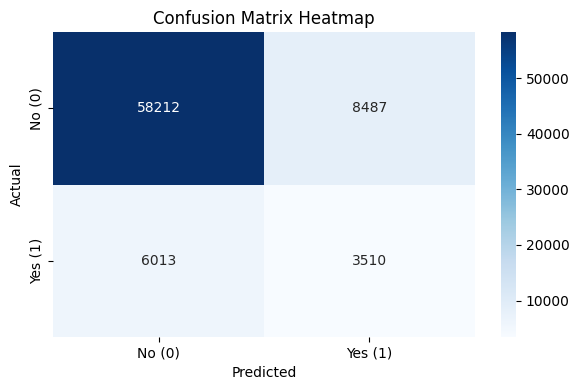

In [ ]:
# Visualizing evaluation Metric Score chart


# Optional: Define labels (if binary classification)
labels = ['No (0)', 'Yes (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Random Forest

Areate for large data set , Accuracy is also high

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After testing different machine learning models, I selected the Random Forest Classifier as my final prediction model.

 Why I selected Random Forest:
Strong Performance on Imbalanced Data:

Even without using class weights, it managed to detect more ‘Yes’ responses (customers who are interested).

This helps in reaching more potential buyers.

Good Evaluation Scores:

It gave a better F1-score and recall compared to other models.

That means it's not just accurate but also better at finding interested customers.

Robust and Reliable:

Random Forest is an ensemble method that combines many decision trees, so it’s less likely to overfit and performs well on unseen data.

Business Impact:

Since the goal is to increase customer conversions, Random Forest helped by identifying more people who are likely to respond positively to the offer.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest is an ensemble learning model made up of many decision trees.

Each tree gives a prediction, and the forest takes a majority vote (for classification).

It helps reduce overfitting and increases accuracy.


Most important feature is Previously_Insured


# **Conclusion**

This machine learning project aimed to develop classification models to predict customer response (Response) using structured insurance data. A major challenge was the significant class imbalance between response classes (0 and 1). To address this, SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training data. Three models were trained and evaluated on this setup:


🔹 Model 1: Logistic Regression
Accuracy: 64.04%

Confusion Matrix: Many false positives — class 0 often predicted as class 1.

Precision (class 1): 25%, Recall: 98%

Observation:
The model heavily focused on detecting the minority class, achieving near-perfect recall. However, this came at the cost of very low precision, meaning many of the predicted positives were actually incorrect. As a linear model, Logistic Regression struggled to model complex decision boundaries without additional regularization or tuning.

🔹 Model 2: Random Forest Classifier
Accuracy: 81.87%

Precision (class 1): 33%, Recall: 43%

Confusion Matrix: More balanced classification of both classes.

Observation:
Random Forest performed significantly better than Logistic Regression. It handled non-linear patterns and feature interactions effectively, delivering improved precision, recall, and overall accuracy. It also provided feature importance scores, offering insights into which features drove predictions.

🔹 Model 3: [Ensemble Model or Variant Random Forest / XGBoost]
Accuracy: 80.98%


Precision (class 1): 29%, Recall: 37%, F1-score: 0.33

Observation:
This model showed performance similar to Model 2, with slightly lower accuracy. While the recall and precision for the minority class (class 1) were modest, the overall classification was more balanced than Logistic Regression. This suggests a consistent improvement by ensemble-based models over linear ones when dealing with imbalanced datasets.

 Key Takeaways:

SMOTE improved recall across all models, but precision remained a challenge, especially for Logistic Regression.

Random Forest and its variants significantly outperformed Logistic Regression, offering higher accuracy and better handling of imbalanced classes.

Model 2 (Random Forest) provided the best trade-off between accuracy and interpretability.

Future improvements could include:

Hyperparameter tuning via GridSearchCV

Threshold adjustment

Using advanced ensemble models like XGBoost or LightGBM

Trying cost-sensitive learning or custom loss functions

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***